**Clustering KMeans Menggunakan Sklearn**

# Simple KMeans

Reference : 

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [0]:
from sklearn.cluster import KMeans
import numpy as np

In [0]:
# Membuat variabel untuk data berupa matriks menggunakan library Numpy
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])
print(X)

[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


In [0]:
# Memanggil fungsi KMeans dengan memasukkan parameter n_cluster (jumlah cluster untuk KMeans, dan
# inisialisasi random_state agar hasil training tidak berubah ketika dijalankan ulang)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("Hasil Training :", kmeans.labels_)  # labels_ digunakan untuk melihat shape dari array value

Hasil Training : [1 0 1 0 0 1]


In [0]:
# Melakukan prediksi data dari hasil training diatas.
# Masukkan parameter nilai matriks baru untuk diprediksi
kp = kmeans.predict([[0, 0], [4, 3]])
print("Hasil Prediksi :", kp)
print("Jumlah Cluster :", kmeans.cluster_centers_) # cluster_centers_ melihat julah cluster centroid yang ada

Hasil Prediksi : [1 0]
Jumlah Cluster : [[3.         3.33333333]
 [2.         0.66666667]]


# KMeans dengan Visualisasi

Reference : 

http://stackabuse.com/k-means-clustering-with-scikit-learn/

In [0]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans

In [0]:
X = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

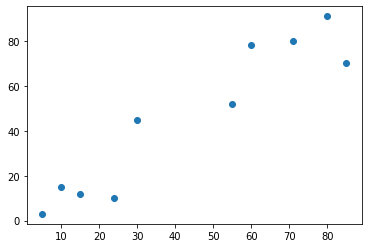

In [0]:
# Visualisai menggunakan matplotlib
plt.scatter(X[:,0],X[:,1], label='True Position')

In [0]:
# Memanggil fungsi KMeans dengan inisialisasi jumlah cluster
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Melihat jumlah cluster centroid yang ada
print(kmeans.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


In [0]:
# Melihat shape dari nilai kmeans
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0]


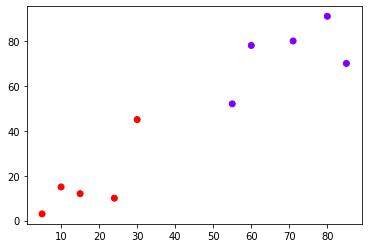

In [0]:
# Melihat hasil cluster yang terbuat dengan kmeans
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

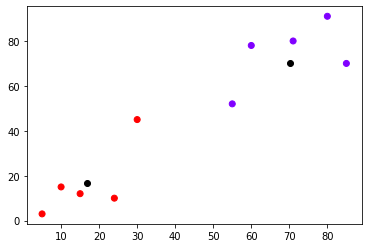

In [0]:
# Melihat cluster dengan menambahkan visual centroid yang ada
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0], color='black')

# KMeans dengan Pandas

Reference :

https://analytics4all.org/2016/05/21/python-k-means-cluster/

Dataset :

https://benlarsonsite.files.wordpress.com/2016/05/kmeans1.xlsx

In [0]:
import pandas as pd

df = pd.read_excel("./sample_data/kmeans1.xlsx")
df

,ID Tag,Model,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost,Department
0,1,MYLAB ALPHA,10,43.333333,54.166667,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING
1,2,ASPEN,1,24.000000,30.000000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING
2,3,IE33,4,210.000000,262.500000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING
3,4,BVI 9400,9,54.666667,68.333333,1,0.0,2.0,150.0,REHAB CENTER
4,5,BVI 9400,1,102.000000,127.500000,0,0.0,2.0,150.0,REHAB CENTER
...,...,...,...,...,...,...,...,...,...,...
191,192,VIVID E9,6,81.000000,101.250000,0,0.0,0.0,0.0,CARDIAC SERVICES-NON INVASIVE
192,193,LOGIQ E9,6,96.000000,120.000000,0,0.0,0.0,0.0,ULTRASOUND
193,194,M-TURBO,1,60.000000,75.000000,0,0.0,0.0,0.0,NEUROSCIENCE CENTER
194,195,FLEX FOCUS 500,1,90.000000,112.500000,0,0.0,0.0,0.0,ENDOSCOPY


In [0]:
# Hilangkan kolom ID Tag, Model dan Department
df1 = df.drop(["ID Tag", "Model", "Department"], axis = 1)
df1.head()

,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost
0,10,43.333333,54.166667,0,0.0,2.0,150.0
1,1,24.000000,30.000000,0,0.0,2.0,150.0
2,4,210.000000,262.500000,0,0.0,2.0,150.0
3,9,54.666667,68.333333,1,0.0,2.0,150.0
4,1,102.000000,127.500000,0,0.0,2.0,150.0


In [0]:
# Gunakan fungsi KMeans dengan jumlah cluster 4, k-means++ digunakan untuk mempercepat pencarian centroid.
# n_init digunakan untuk inisialisasi jumlah iterasi untuk centroid baru.

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10)

In [0]:
# Training model yang sudah dibuat

km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Lihat cluster centroid yang terbentuk

print(km.cluster_centers_)

[[2.35897436e+01 1.53496792e+02 1.91870990e+02 4.87179487e-01
  4.99197222e+01 1.48717949e+00 1.11538462e+02]
 [1.22684564e+01 8.24766990e+01 1.03095874e+02 3.22147651e-01
  5.91066653e+00 1.14703611e+00 8.60277086e+01]
 [2.11428571e+01 1.78123093e+02 2.22653867e+02 4.28571429e-01
  4.53190542e+02 1.87551020e+00 1.40663265e+02]
 [2.40000000e+01 1.64250000e+02 2.05312500e+02 0.00000000e+00
  1.42016667e+03 1.00000000e+00 7.50000000e+01]]


In [0]:
# Lihat hasil cluster untuk setiap label shape

print(km.labels_)

[1 1 0 1 1 0 2 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 0 0 1 1 2 1 1 2 1 1 1 0 1 2 0
 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 2 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 0 1 1 1 1 1 0]


In [0]:
# Prediksi untuk data pada df1

x = km.fit_predict(df1)
x

array([0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2],
      dtype=int32)

In [0]:
# Buat kolom baru pada dataset untuk menampung data kategori cluster

df["Cluster"]= x
df.head()

,ID Tag,Model,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost,Department,Cluster
0,1,MYLAB ALPHA,10,43.333333,54.166667,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING,0
1,2,ASPEN,1,24.000000,30.000000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING,0
2,3,IE33,4,210.000000,262.500000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING,2
3,4,BVI 9400,9,54.666667,68.333333,1,0.0,2.0,150.0,REHAB CENTER,0
4,5,BVI 9400,1,102.000000,127.500000,0,0.0,2.0,150.0,REHAB CENTER,0


In [0]:
# Urutkan data berdasarkan kolom cluster
df1 = df.sort_values(by=['Cluster'])
df1

,ID Tag,Model,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost,Department,Cluster
0,1,MYLAB ALPHA,10,43.333333,54.166667,0,0.000000,2.000000,150.000000,CARDIOVASCULAR IMAGING,0
104,105,IE33,27,109.777778,137.222222,0,0.000000,1.000000,75.000000,ANESTHESIA,0
103,104,M2424A,6,105.000000,131.250000,0,0.000000,1.000000,75.000000,ANESTHESIA,0
102,103,SONOS 4500,15,82.800000,103.500000,0,0.000000,1.000000,75.000000,OPERATING ROOM,0
165,166,EU-M30,7,49.000000,61.250000,1,0.000000,0.000000,0.000000,ENDOSCOPY,0
...,...,...,...,...,...,...,...,...,...,...,...
87,88,LOGIQ E9,52,112.269231,140.336538,0,18.615385,1.000000,75.000000,ULTRASOUND,2
86,87,SEQUOIA 512,39,110.769231,138.461538,2,54.974359,1.179487,88.461538,PEDIATRIC CARDIOLOGY,2
79,80,VIVID-I,49,129.795918,162.244898,1,45.002245,1.000000,75.000000,PEDIATRIC CARDIOLOGY,2
113,114,S5I,40,139.200000,174.000000,0,47.275000,1.000000,75.000000,CATH LAB,2


# KMeans - Data Pengunjung Mall

Reference :

https://www.megabagus.id/k-means-clustering/3/

Dataset :

https://www.megabagus.id/download/data-k-means-clustering/

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Mengimpor dataset
dataset = pd.read_csv('./sample_data/Pengunjung_mall.csv')
X = dataset.iloc[:, [3, 4]].values  # melakukan slicing, dari dataset yang dimiliki. Kita hanya memerlukan kolom ke 3 (pendapatan) dan 4 (rating pengeluaran) saja

In [0]:
dataset

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
...,...,...,...,...,...
195,196,Perempuan,35,120,79
196,197,Perempuan,45,126,28
197,198,Laki,32,126,74
198,199,Laki,32,137,18


In [0]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

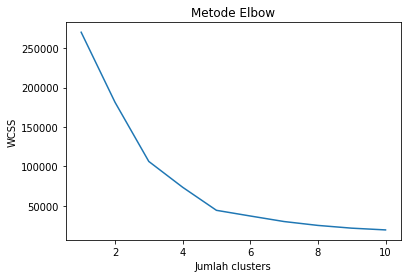

In [0]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
# perintah looping, perlu diingat bahwa kita ingin melakukan looping 10 kali. Oleh karena itu di python ditulis range(1,11), 
# karena angka 11 tidak diikutkan oleh python. Sehingga jika ingin iterasi sebanyak 21 kali misalnya, maka penulisannya range (1,22).
# Line 14 adalah menuliskan objek kmeans untuk melakukan algoritma K-Means. Selanjutnya perintah pertama adalah KMeans (kapital K dan M), 
# yang merupakan class dari library K-Means yang diimpor di line 11, dengan beberapa parameter n_clusters yang merupakan jumlah kluster, 
# diikuti dengan parameter kedua init yang merupakan pemilihan jumlah K di awal (kali ini kita gunakan K++, agar tidak terkena jebakan centroid. 
# Kemudian parameter yang terakhir adalah random_state = 42. Random state ini seperti seed pada R, yang jika dipilih 42, maka ketika kita memilih 42 
# di kesempatan yang berbeda, maka bilangan random yang dihasilkan akan sama. Tips: Arahkan kurson pada KMeans, lalu ketik CTRL+i pada keyboard untuk 
# menampilkan parameter apa saja yang diperlukan.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()



---

Melalui gambar di atas, dapat dilihat bahwa bentuk elbow (siku) terlihat saat jumlah kluster adalah 5. Oleh karena itu, kita tentukan bahwa jumlah K yang baik adalah 5.

Note: Jika pembaca berpendapat bahwa bentuk siku juga terlihat pada K=3, maka itu juga benar. Dalam kondisi seperti ini, di mana K=3 dan K=5 menunjukkan bentuk siku, kita pilih yang nilai K nya lebih besar, dalam hal ini K=5.

In [0]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

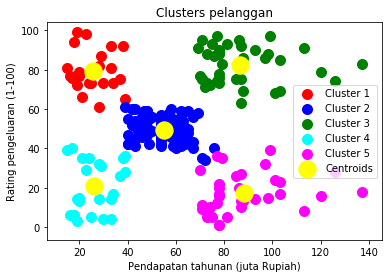

In [0]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()